In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Normal Method

In [10]:
def normal_method(df, degree):
    X = df.iloc[:, 0].values.reshape(100,1)
    Y = df.iloc[:, 1].values.reshape(100,1)

    X = np.array(X)
    Y = np.array(Y)

    H = np.zeros([len(X), degree+1])
    W = np.ones([degree+1, 1])

    for i in range(len(X)):
        H[i][0] = 1
        for j in range(1, degree+1):
            H[i][j] = X[i]**j
        
    Y_pred = H.dot(W)

    H_t = H.transpose()
    m = np.linalg.inv(H_t.dot(H))
    n = H_t.dot(Y)
    w = m.dot(n)

    return w

# Gradient Descent Method

In [11]:
def Y_predictor(X,w):
    for i in range(len(w)):
        Y = w[i] * (X**i)
    return Y

In [12]:
def gradient_descent(X, Y, learning_rate, degree, w):
    
    # gradient descent algorithm
    gradient = np.zeros([degree+1,1])
    N = float(len(X))
    
    for i in range(degree+1):
        Y_pred = Y_predictor(X,w)
        gradient[i] = (-2/N) * sum((X**i) * (Y - Y_pred))
    
    w = w - learning_rate * gradient
    return w

In [13]:
def gradient_descent_runner(X, Y, learning_rate, epoch, degree, w):
    
    for i in range(epoch):
        w = gradient_descent(X, Y, learning_rate, degree, w) # gradient descent algorithm
    
    return w

In [14]:
def gradient_plotter(X, Y, w, text):
    Y_pred = Y_predictor(X,w)
    
    print("Y_intercept = {}\nCoefficients = {}".format(w[0],w[1:]))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Random Test Data\n {}'.format(text))
    plt.scatter(X, Y, alpha=0.7)
    plt.scatter(X,Y_pred, marker='.', color='r')
    plt.show()

In [15]:
def run():
    
    df = pd.read_csv('polynomial_data.csv') #reading data
    epoch = 1 #iteration count
    
    degree = 3
    w = np.zeros([degree+1,1])
    
    learning_rate = 0.0001 #learning rate
    X = df.iloc[:, 0] # X column of the data
    Y = df.iloc[:, 1] # Y column of the data
    
    #if the number of features in X are more than 10,000 use gradient descent
    w = gradient_descent_runner(X, Y, learning_rate, epoch, degree, w)
    gradient_plotter(X, Y, w, 'Gradient Descent Method')
    
    #if the number of features in X are less than 10,000 use the normal equation
    w = normal_method(df, degree)
    gradient_plotter(X, Y, w, 'Normal Method')

Y_intercept = [0.0022612]
Coefficients = [[0.02430241]
 [0.15218315]
 [1.42726361]]


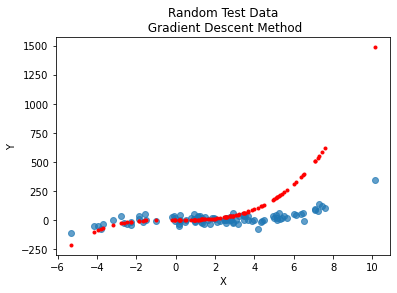

Y_intercept = [6.19459878]
Coefficients = [[-1.70291109]
 [-1.9026886 ]
 [ 0.52796149]]


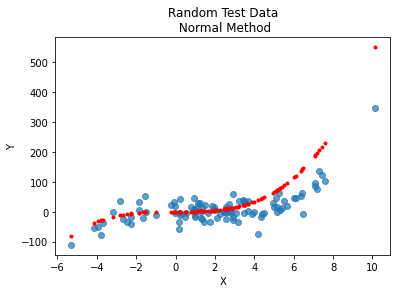

In [16]:
if __name__ == '__main__':
    run()